# TÍTULO
"SOBRECARGA DE TRABAJO EN LOS CENTROS DE SERVICIOS SOCIALES EN EL AYUNTAMIENTO DE MADRID"

## TEMA:
"VALORAR LA SOBREEXPLOTACION DE LOS TRABAJADORES SOCIALES EN EPOCA POST-COVID"

Los datos a valorar son los del año 2021, que es un año completo.

Sería interesante ver los datos en los años 2019 y 2020 para valorar como ha ido evolucionando en estos años

### HIPÓTESIS
hipotesis_1 = "Hay mucha demanda de ayudas y servicios sociales en determinados distritos (valorar si es en todos) y poco personal para absorber esta demanda"

hipotesis_2 = "Valorar si hay suficientes recursos no humanos para atender las demandas de los usuarios"

In [1]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure

In [2]:
"""
PALETAS PARA GRAFICAS
"""
paleta_distrito=['#cc0000','#fc0000','#fc0000','#ff0000','#ff0000','#ff8000','#ff9933','#999900','#336600','#009900','#00ff00','#33ffff','#00cccc','#0080ff','#0000ff','#0000cc','#004c99','#000099','#000099','#000066','#000066']
paleta_centro=['#cc0000','#cc0000','#cc0000','#fc0000','#fc0000','#fc0000','#ff0000','#ff0000','#ff8000','#ff9933','#ff9933','#999900','#999900','#336600','#336600','#00ff00','#00ff00','#33ffff','#33ffff','#00cccc','#00cccc','#0080ff','#0080ff','#0000ff','#0000ff','#0000ff','#0000cc','#0000cc','#0000cc','#004c99','#004c99','#004c99','#000099','#000099','#000066','#000066','#000066']

### 1.- Obtención de los datos

La fuente principal de todos los datos obtenidos ha sido a través de las páginas del ayuntamiento de Madrid (MUNIMADRID y PORTAL DE DATOS ABIERTOS DEL AYUNTAMIENTO DE MADRID)

In [ ]:
# guarda en variables los datasets y su fuente
# df_1 = pd.DataFrame()
# URL_indice_vulnerabilidad_rentas="https://datos.madrid.es/sites/v/index.jsp?vgnextoid=bbd71fa5c48a0810VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD""
##  DE ESTE VINCULO (Esfera de Economía y Empleo por Distritos y Barrios) SE EXTRAEN DATOS DE RENTA MEDIA POR HOGAR

#df_2 = pd.DataFrame()
# Servicios Sociales Ayto
## ESTE ES UN FICHERO EXTRAIDO DE DATOS.MADRID, DEL CUAL NO TENGO VINCULO. EN EL SE DETALLA EL NUMERO DE TRABAJADORES POR CENTRO Y DISTRITO

#df_3 = pd.DataFrame()
# URL_personas_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=8c936c7fe412b610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SE DETALLAN LAS PERSONAS ATENDIDAS

#df_4 = pd.DataFrame()
# URL_citas_proporcionadas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=73ee23d869578610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SE DETALLAN LAS CITAS QUE SE HAN DADO A USUARIOS, RELACIONADA CON EL DF_3

#df_5 = pd.DataFrame()
# URL_demandas_de_servicio="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=40ab4e8b0327d610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SOLICITUDES DE PROCESOS SOLICITADOS POR LOS USUARIOS

#df_6 = pd.DataFrame()
# URL_urgencias_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0b006dace9578610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# URGENCIAS ATENDIDAS EN LOS CENTROS. ESTAS URGENCIAS SON DE LA SIGUIENTES TIPOLOGIAS 
# Abandono
# Alojamiento/Vivienda
# Desprotección social problema salud
# Desprotección socio-familiar
# Malos tratos

#df_7 = pd.DataFrame()
# URL: http://www-2.munimadrid.es/CSE6/control/mostrarDatos
## ESTE ES UN FICHERO EXTRAIDO DE MUNIMADRID, EL CUAL ES UN FICHERO DE EXCEL DONDE EXTRAIGO LA POBLACION DE CADA DISTRITO


# OTROS POSIBLES DF QUE PUDIERA NECESITAR:
#URL_datos_abiertos_madrid="https://datos.madrid.es/portal/site/egob/menuitem.9e1e2f6404558187cf35cf3584f1a5a0/?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_centros_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c123e08dafc8410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ayudas_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=00937b777f8ea610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_panel_indicador="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ranking_vulnerabilidad="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d029ed1e80d38610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"


### 2.- Extraccion de datos de los diferentes Datasets y almacenamiento en nuevo fichero situado en data\Outcomes

In [ ]:
df_1= pd.read_excel("data\Incomes\indice_vulnerabilidad_rentas.xlsx",sheet_name="Descriptivos distritos")

df_1.info()

In [ ]:
df_1.head()

De este DataFrame tomaré los datos de "Codigo distrito" ,"Nombre Distrito" y "Renta media por hogar".

No hace falta hacer modificación sobre estos datos.

In [ ]:
df_1=df_1[["Codigo distrito","Nombre distrito","Renta neta media por hogar"]]

In [ ]:
df_1.to_csv('data\Outcomes\df_1.csv',header=True,index=False)

In [ ]:
df_2= pd.read_csv("data\Incomes\Trabajadores_sociales.csv",sep=';',encoding='iso8859_16')
df_2.info()

In [ ]:
df_2.head()

De este DataFrame vamos a tomar los datos de "Codigo Distrito", "Distrito_L", "Centro" y "Trabajadores Sociales Total".

Esta última columna la generaré realizando la suma de "Trabajadores Sociales PA" y "Trabajadores Sociales Zona".

Sobre los datos de este DataFrame es desde partiré para realizar los estudios de los diferentes parámetros.

In [ ]:
df_2["Trabajadores Sociales Total"]=df_2["Trabajadores sociales PA"]+df_2["Trabajadores sociales Zona"]

df_2=df_2[["Distrito","Distrito_L","Centro_L","Trabajadores Sociales Total"]]

df_2.rename({"Distrito":'Codigo distrito',"Distrito_L":'Nombre distrito','Centro_L':'Centro'}, axis=1,inplace=True)                            ##   REEMPLAZO NOMBRES COLUMNAS PARA UNIFICARLOS CON EL RESTO DE LOS DATAFRAME A UTILIZAR

In [ ]:
df_2.to_csv('data\Outcomes\df_2.csv',header=True,index=False)

In [ ]:
df_3=pd.read_csv("data\Incomes\personas_atendidas_atencion_primaria_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_3.info()

De este DataFrame tomaré los datos de "Centro" y "Distrito Centro" para poder referenciar con el resto.

Y realizaré un conteo de las personas atendidas en cada centro.

In [ ]:
df_3.head()

In [ ]:
df_3=df_3.groupby(['Centro','Distrito Centro'], as_index=False)[['Año Atención']].count()                

df_3.rename({'Año Atención':'N_personas_atendidas'}, axis=1,inplace=True)   
                                          

In [ ]:
df_3.to_csv('data\Outcomes\df_3.csv',header=True,index=False)

In [ ]:
df_4=pd.read_csv("data\Incomes\citas_proporcionada_2021.csv",sep=';',encoding='latin-1',index_col='Secuencia')

df_4.info()

In [ ]:
df_4.head()

De este DataFrame tomaré los datos de "Centro" y "Distrito Centro" para poder referenciar con el resto.

Y realizaré un conteo de las personas que solicitaron cita en cada centro para ver si hay correlación con el resto de las variables.

In [ ]:
df_4=df_4.groupby(['Centro','Distrito Centro'], as_index=False)[['Fecha Cita']].count()              
df_4_1
df_4.rename({'Fecha Cita':'N_citas_proporcionadas'}, axis=1,inplace=True)                            

In [ ]:
df_4

In [ ]:
df_4.to_csv('data\Outcomes\df_4.csv',header=True,index=False)

In [ ]:
df_5=pd.read_csv("data\Incomes\demandas_de_servicio_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_5.info()

In [ ]:
df_5.head()

De este DataFrame tomaré igualmente los datos de "Centro" y "Distrito Centro" para poder referenciar con el resto.

Y realizaré un conteo de las personas que demandaron algún servicio para ver si hay correlación con el resto de las variables.

In [ ]:
df_5.rename({'Fecha Demanda':'N_demandas'}, axis=1,inplace=True)                               

df_5=df_5.groupby(['Centro','Distrito Centro'], as_index=False)[['N_demandas']].count()        

In [ ]:
df_5

In [ ]:
df_5.to_csv('data\Outcomes\df_5.csv',header=True,index=False)

### 3.- Preparando los datos para la realización de las gráficas oportunas.

Tras haber salvado los datos relevantes de las tablas en ficheros Outcomes tipo .csv vamos a proceder a trabajar con ellos para lo que iremos importando nuevamente estos ficheros, juntandolos con __"merge"__ , realizar diversas transformaciones y desarrollar las gráficas oportunas.

Las separaremos en 2 grupos de datos:
- Una tabla para agrupar los dos primeros DataFrames donde relacionaré los datos en cada distrito, los Centros de Atención Primaria de los Servicios Sociales y los Trabajadores Sociales que hay en cada distrito.
- Una tabla para asignar la carga de trabajo que hay en cada Centro de Atención Primaria de Servicios Sociales.


In [3]:
df_1= pd.read_csv('data\Outcomes\df_1.csv')
df_2= pd.read_csv('data\Outcomes\df_2.csv')

In [4]:
df_2['Numero de centros por distrito']=df_2[['Codigo distrito','Nombre distrito','Centro']].groupby('Codigo distrito')['Centro'].count()
df_2['Numero de centros por distrito'].fillna(1,inplace=True)

In [5]:
df_1=df_1.sort_values(by='Renta neta media por hogar',ascending=True) 
df_2=df_2[['Codigo distrito','Nombre distrito','Trabajadores Sociales Total','Numero de centros por distrito']].groupby('Codigo distrito').sum('Trabajadores Sociales Total').reset_index()
## Ordeno de menor a mayor los distintos distritos en función de la Renta Media de cada hogar

In [6]:
Grafico_1_1=pd.merge(df_1,df_2)  

In [7]:
Grafico_1_1                             ## Aqui se pueden ver los datos con los que realizaré las primeras gráficas

,Codigo distrito,Nombre distrito,Renta neta media por hogar,Trabajadores Sociales Total,Numero de centros por distrito
0,13,Puente de Vallecas,27975,43,4.0
1,12,Usera,29061,30,4.0
2,17,Villaverde,29873,25,2.0
3,11,Carabanchel,31190,38,5.0
4,10,Latina,33237,36,7.0
5,18,Villa de Vallecas,34168,8,1.0
6,19,Vicálvaro,35510,15,2.0
7,14,Moratalaz,37951,12,1.0
8,1,Centro,38171,22,3.0
9,20,San Blas - Canillejas,38560,23,2.0


In [34]:
df_2= pd.read_csv('data\Outcomes\df_2.csv')

df_3= pd.read_csv('data\Outcomes\df_3.csv')

df_4= pd.read_csv('data\Outcomes\df_4.csv')

df_5= pd.read_csv('data\Outcomes\df_5.csv')

In [35]:
df_3=df_3.sort_values(by='N_personas_atendidas',ascending=False)         

In [36]:
Grafico_2=pd.merge(df_3,df_4,how="inner")

In [37]:
Grafico_2=pd.merge(Grafico_2,df_5,how="inner")

In [38]:
Grafico_2_1=pd.merge(df_2,Grafico_2,how="inner").sort_values(by='N_personas_atendidas',ascending=False)               ## ORDENO POR EL NUMERO DE PERSONAS ATENDIDAS

In [39]:
Grafico_2_1['N_personas_atendidas']=round(Grafico_2_1['N_personas_atendidas']/220,2)                            # Recalculo las variables que están por año a día trabajado por el personal 

Grafico_2_1['N_citas_proporcionadas']=round(Grafico_2_1['N_citas_proporcionadas']/220,2)                        # que es 220 días laborales según datos extraidos y lo redondeo a 2 decimales

Grafico_2_1['N_demandas']=round(Grafico_2_1['N_demandas']/220,2)

Grafico_2_1=Grafico_2_1[['Nombre distrito','Centro','Trabajadores Sociales Total','N_personas_atendidas','N_citas_proporcionadas','N_demandas']]

In [40]:
Grafico_2_1                             ## Aqui se pueden ver los datos con los que realizaré las segundas gráficas

,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas
25,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80
17,Carabanchel,CSS Zaida,18,91.61,72.80,22.39
19,Usera,CSS San Filiberto,18,85.88,60.10,25.68
29,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28
13,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26
30,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92
24,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33
31,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86
23,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47
15,Latina,CSS Gallur,12,65.24,68.15,14.54


In [41]:
Grafico_2_1['Citas_atendidas_por_trabajador']=round(Grafico_2_1['N_personas_atendidas']/Grafico_2_1['Trabajadores Sociales Total'],2)

Grafico_2_1['Citas_proporcionadas_por_trabajador']=round(Grafico_2_1['N_citas_proporcionadas']/Grafico_2_1['Trabajadores Sociales Total'],2)

Grafico_2_1['Demandas_por_trabajador']=round(Grafico_2_1['N_demandas']/Grafico_2_1['Trabajadores Sociales Total'],2)

Grafico_2_2=Grafico_2_1[['Nombre distrito','Centro','Trabajadores Sociales Total','Citas_atendidas_por_trabajador','Citas_proporcionadas_por_trabajador','Demandas_por_trabajador']]

Grafico_2_1.drop(['Citas_atendidas_por_trabajador','Citas_proporcionadas_por_trabajador','Demandas_por_trabajador'],axis=1,inplace=True)

Grafico_2_2                                             ## Aqui se puede ver los mismos datos pero referenciados por cada Trabajador Social

,Nombre distrito,Centro,Trabajadores Sociales Total,Citas_atendidas_por_trabajador,Citas_proporcionadas_por_trabajador,Demandas_por_trabajador
25,Ciudad Lineal,CSS Luis Vives,20,5.06,3.55,1.54
17,Carabanchel,CSS Zaida,18,5.09,4.04,1.24
19,Usera,CSS San Filiberto,18,4.77,3.34,1.43
29,Villaverde,CSS Huerta de Villaverde,15,5.48,3.05,2.15
13,Latina,CSS Fuerte de Navidad,13,5.40,5.70,0.40
30,Villaverde,CSS Eduardo Minguito,10,6.93,5.26,4.99
24,Moratalaz,CSS Fuente Carrantona,12,5.57,2.97,1.44
31,Villa de Vallecas,CSS Villa de Vallecas,8,8.28,5.60,3.48
23,Puente de Vallecas,CSS San Diego,12,5.48,4.49,0.21
15,Latina,CSS Gallur,12,5.44,5.68,1.21


Vamos a hacer un mapa con los distintos centros sociales existentes en la ciudad de Madrid donde agregaremos la información de las tablas anteriores.

In [42]:
df_8= pd.read_csv('Data\Outcomes\df_8.csv')                                                      ##Los datos que aparecen aquí están tomados directamente de Google Maps y anotados en un fichero 


In [43]:
mapa_css=pd.merge(Grafico_2_2,df_8)  

In [45]:
mapa_css

,Nombre distrito,Centro,Trabajadores Sociales Total,Citas_atendidas_por_trabajador,Citas_proporcionadas_por_trabajador,Demandas_por_trabajador,Codigo distrito,lat,lon
0,Ciudad Lineal,CSS Luis Vives,20,5.06,3.55,1.54,15,40.425017,-3.628440
1,Carabanchel,CSS Zaida,18,5.09,4.04,1.24,11,40.393442,-3.736259
2,Usera,CSS San Filiberto,18,4.77,3.34,1.43,12,40.386020,-3.715218
3,Villaverde,CSS Huerta de Villaverde,15,5.48,3.05,2.15,17,40.348595,-3.711033
4,Latina,CSS Fuerte de Navidad,13,5.40,5.70,0.40,10,40.380625,-3.765628
5,Villaverde,CSS Eduardo Minguito,10,6.93,5.26,4.99,17,40.348248,-3.686532
6,Moratalaz,CSS Fuente Carrantona,12,5.57,2.97,1.44,14,40.399828,-3.636298
7,Villa de Vallecas,CSS Villa de Vallecas,8,8.28,5.60,3.48,18,40.377442,-3.623138
8,Puente de Vallecas,CSS San Diego,12,5.48,4.49,0.21,13,40.388877,-3.663756
9,Latina,CSS Gallur,12,5.44,5.68,1.21,10,40.397410,-3.741546


In [46]:
mapa_css.insert(0,"Color",paleta_centro,True)                                           ##  Agregamos la paleta de colores por centro para tener un gráfico dónde se marquen esta referencia

print(mapa_css)

      Color      Nombre distrito                       Centro  \
0   #cc0000        Ciudad Lineal               CSS Luis Vives   
1   #cc0000          Carabanchel                    CSS Zaida   
2   #cc0000                Usera            CSS San Filiberto   
3   #fc0000           Villaverde     CSS Huerta de Villaverde   
4   #fc0000               Latina        CSS Fuerte de Navidad   
5   #fc0000           Villaverde         CSS Eduardo Minguito   
6   #ff0000            Moratalaz        CSS Fuente Carrantona   
7   #ff0000    Villa de Vallecas        CSS Villa de Vallecas   
8   #ff8000   Puente de Vallecas                CSS San Diego   
9   #ff9933               Latina                   CSS Gallur   
10  #ff9933           Arganzuela          CSS José Villarreal   
11  #999900               Tetuan              CSS María Zayas   
12  #999900               Latina              CSS Los Yébenes   
13  #336600  Fuencarral-El pardo      CSS San Vicente de Paúl   
14  #336600  San Blas-Can

In [47]:
mapa_css=mapa_css.applymap(str)                 ##  Vamos a pasar todos los datos a "STRING" para poder hacer que aparezcan en el mapa

mapa_css.info()                                 ##  y verificamos que se han convertido todos los "INT" Y "FLOAT" a STR

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Color                                37 non-null     object
 1   Nombre distrito                      37 non-null     object
 2   Centro                               37 non-null     object
 3   Trabajadores Sociales Total          37 non-null     object
 4   Citas_atendidas_por_trabajador       37 non-null     object
 5   Citas_proporcionadas_por_trabajador  37 non-null     object
 6   Demandas_por_trabajador              37 non-null     object
 7   Codigo distrito                      37 non-null     object
 8   lat                                  37 non-null     object
 9   lon                                  37 non-null     object
dtypes: object(10)
memory usage: 3.2+ KB


### 4.- Graficas

#### GRAFICA 1

1.- Primera opción de Gráfica

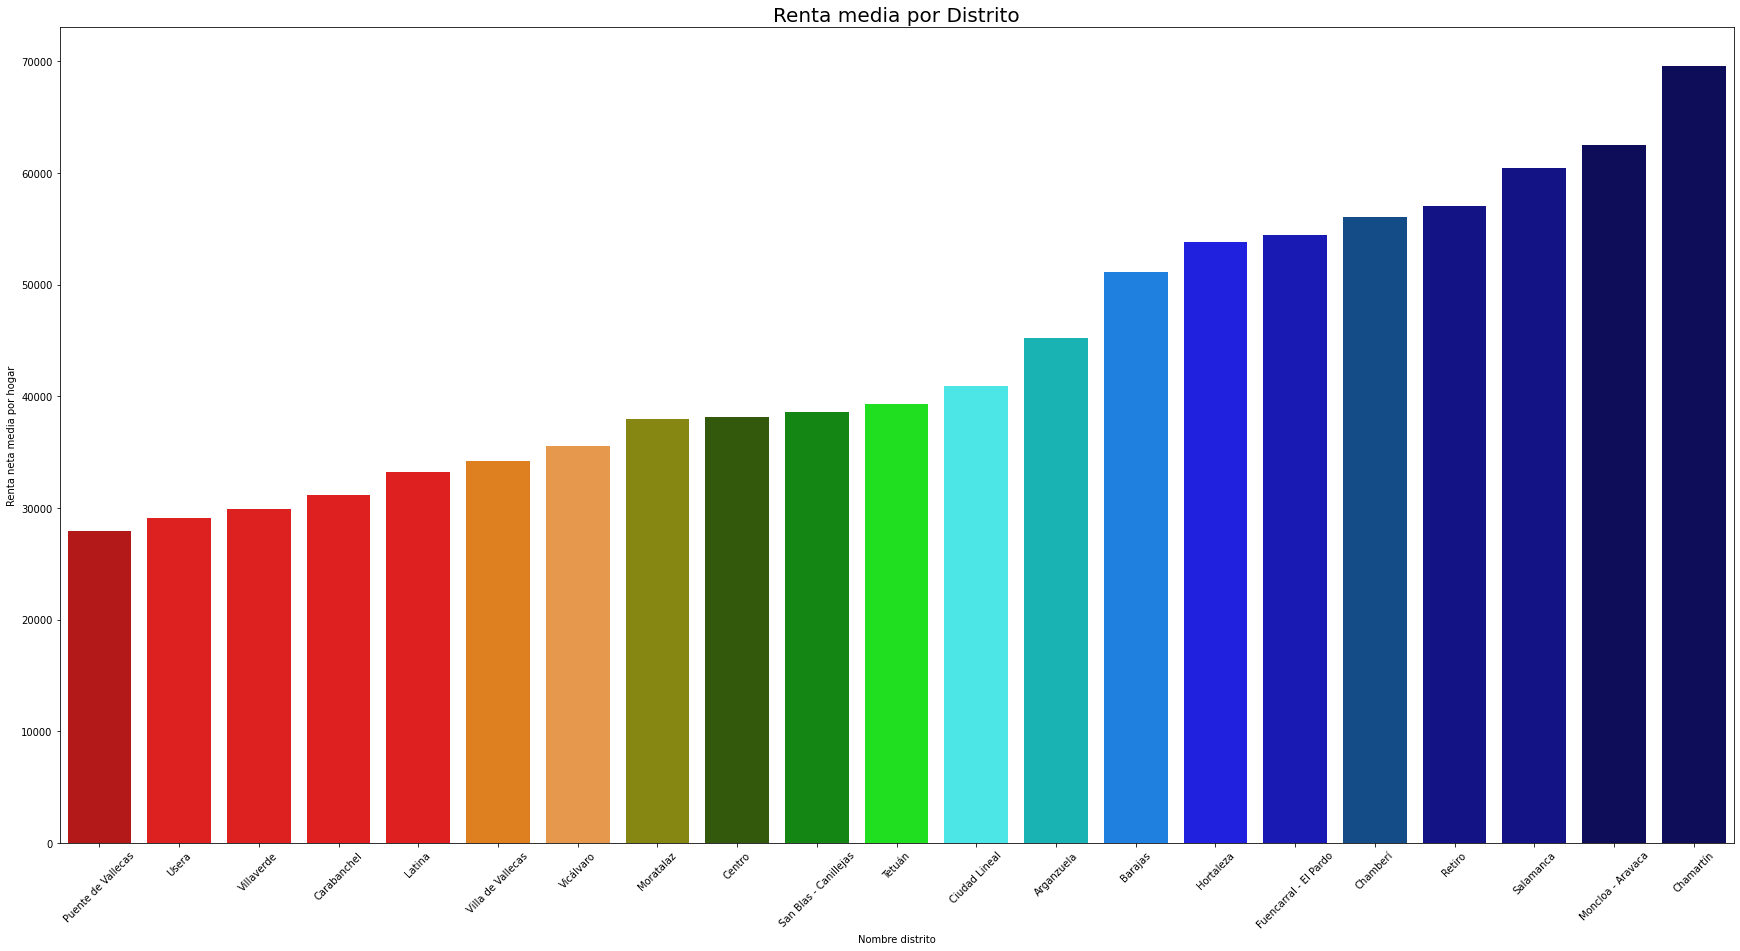

In [48]:
plt.figure(figsize=(30,15))
sns.barplot(x=Grafico_1_1['Nombre distrito'],
                y=Grafico_1_1['Renta neta media por hogar']
                ,palette=paleta_distrito)
plt.xticks(rotation=45, fontsize=10)
plt.title('Renta media por Distrito',fontsize=20);

2.- Segunda opción de Gráfica

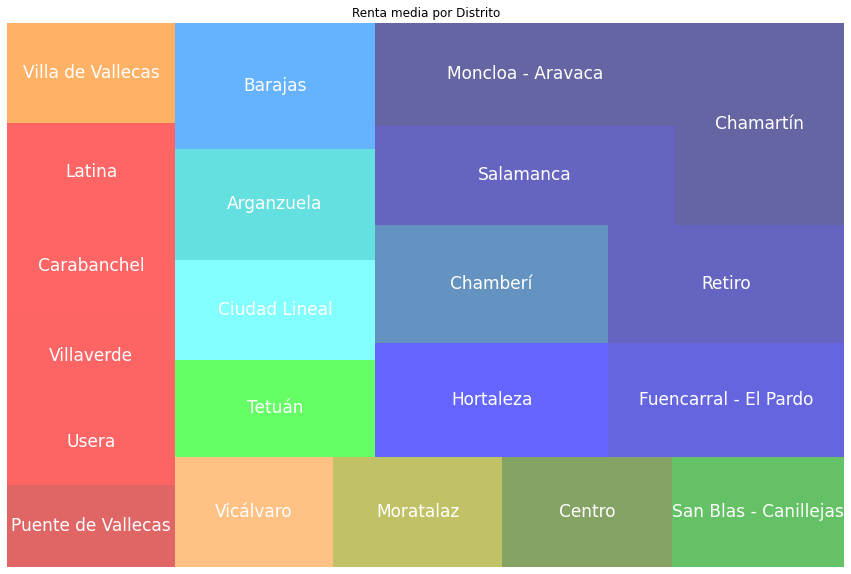

In [50]:
plt.figure(figsize=(15,10))
squarify.plot(sizes=Grafico_1_1['Renta neta media por hogar'], label=Grafico_1_1['Nombre distrito'], alpha=.6,color=paleta_distrito,text_kwargs={'fontsize': 17,'color':'w'})
plt.axis('off')
plt.title('Renta media por Distrito');

Tras haber realizado una gráfica de barras y un Treemap, hemos decidido representar mejor los resultados en esta última opción, donde los colores representan las rentas medias más bajas por hogar.

Los colores van desde el rojo para rentas medias más bajas hasta azules para las rentas medias más altas.

#### GRAFICA 2

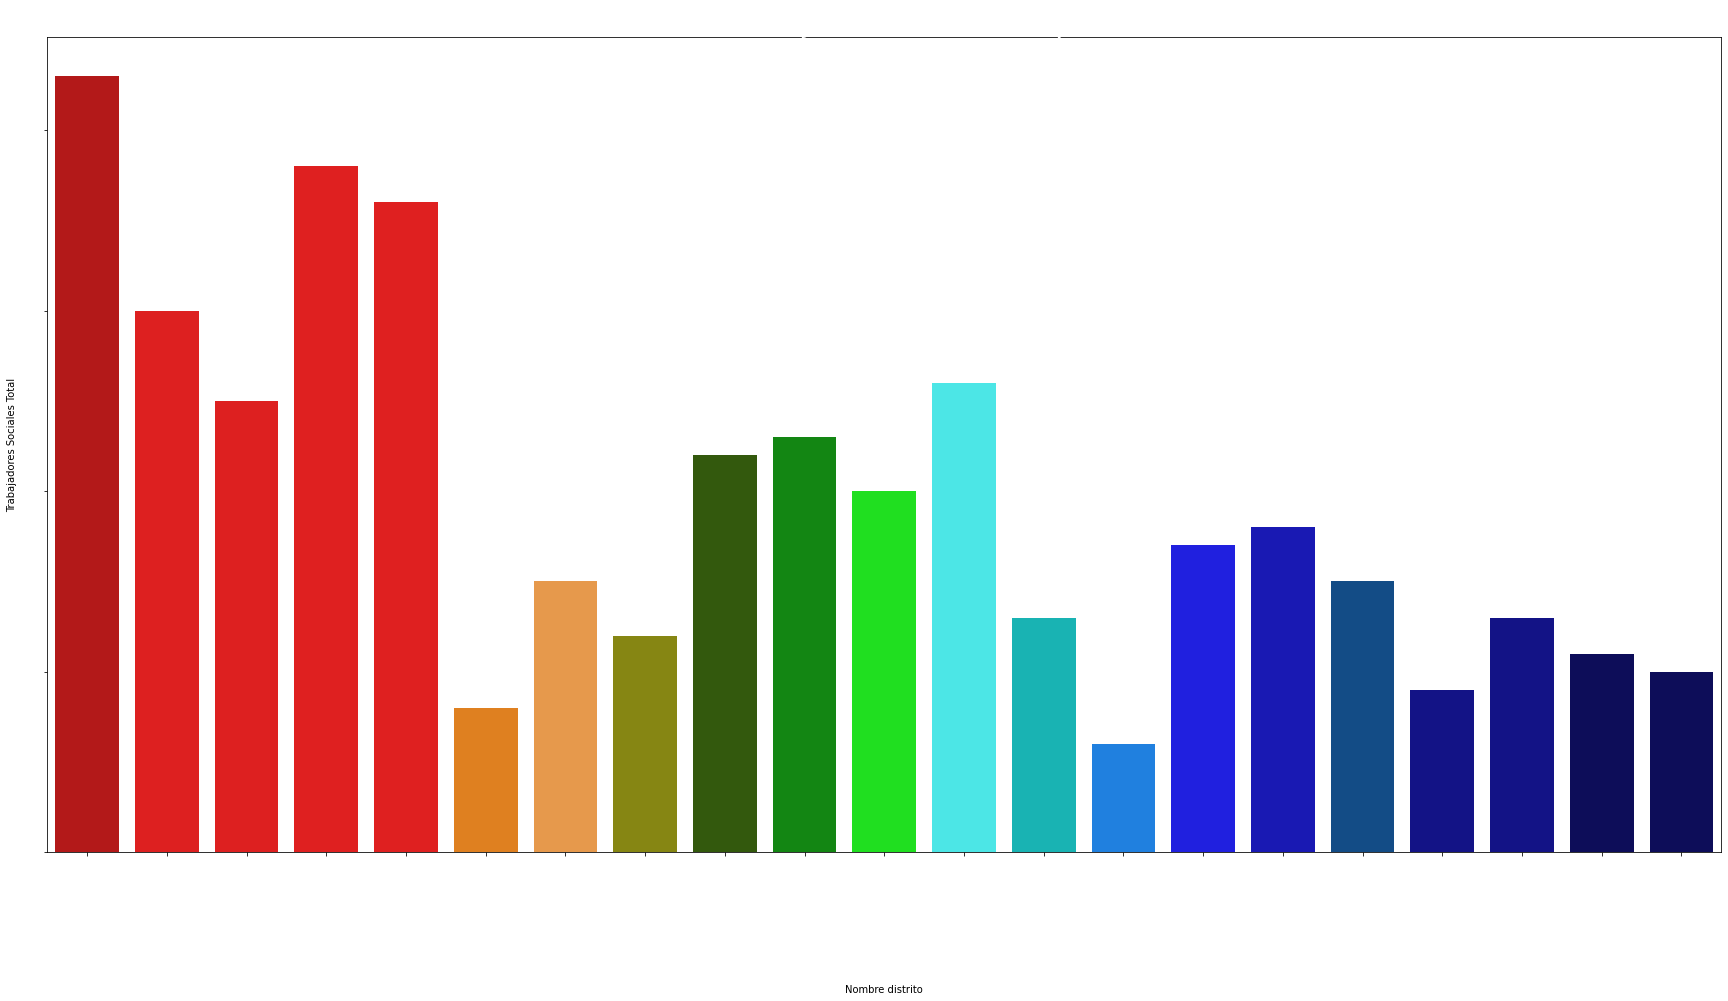

In [51]:
plt.figure(figsize=(30,15))
sns.barplot(x=Grafico_1_1['Nombre distrito'],
                y=Grafico_1_1['Trabajadores Sociales Total'],
                palette=paleta_distrito )
plt.yticks(fontsize=15,color='w')
plt.xticks(rotation=45, fontsize=15,color='w')
plt.title('Número de Trabajadores Sociales por Distrito',fontsize=30,color='w');

#### GRAFICA 3

Primeramente haremos un heatmap para observar la correlación existente entre las distintas variales

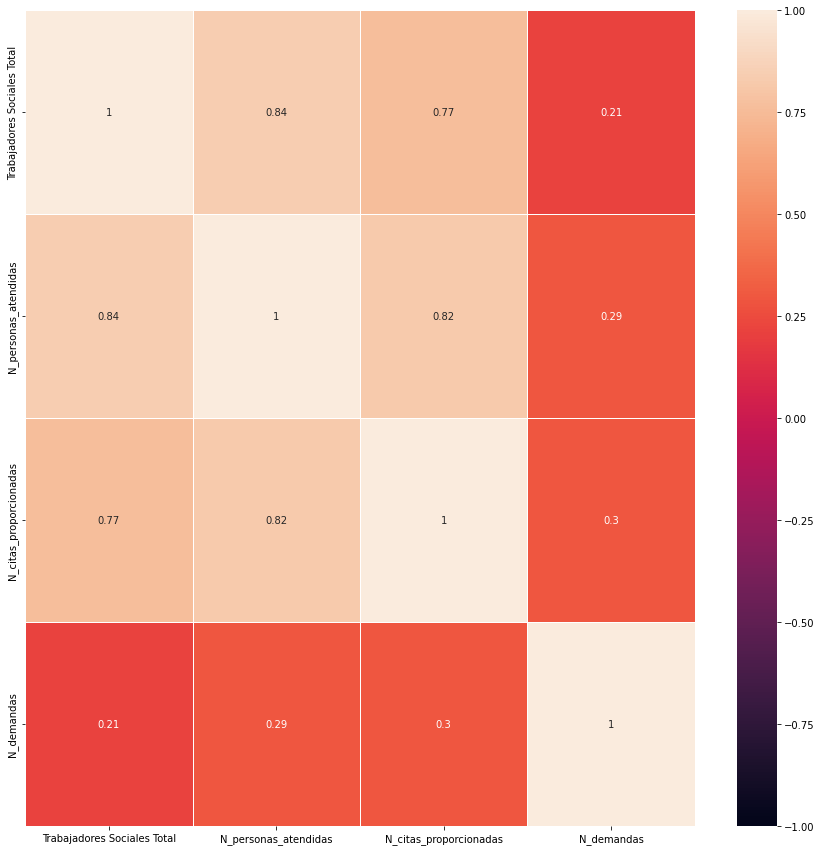

In [52]:
plt.figure(figsize=(15,15))

sns.heatmap(Grafico_2_1.corr(),
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)

plt.yticks(fontsize=10,color='black')

plt.xticks(fontsize=10,color='black');

Se observa que __hay correlación__ entre las citas proporcionadas, las citas atendidas y el número de Trabajadores Sociales que hay en cada centro.

También se observa que __hay poca correlación__ con las demandas atendidas en cada Centro de Atención Primaria de los Servicios Sociales.

#### GRAFICA 4

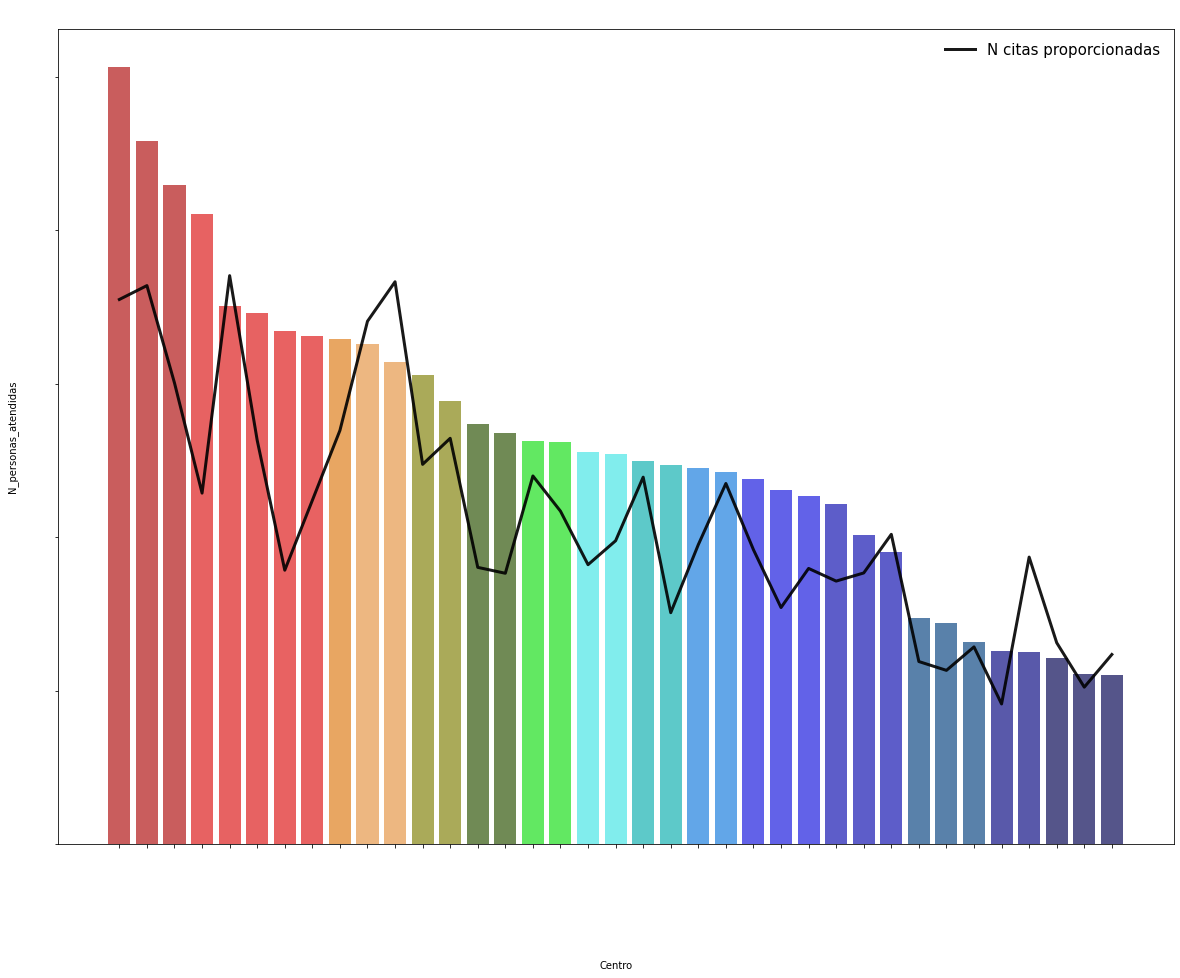

In [53]:
plt.figure(figsize=(20,15))

sns.barplot(x="Centro",
            y="N_personas_atendidas",
            palette=paleta_centro,
            data=Grafico_2_1,
            alpha=0.7,
           ci=None)

sns.lineplot(x='Centro', y='N_citas_proporcionadas', data=Grafico_2_1, color='k', alpha=0.9,linewidth=3,
            label="N citas proporcionadas",markers=True)

plt.title("Relación entre citas solicitadas y personas atendidas",fontsize=20,color='w');

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

No se observa una relación directa entre ambas variables, ya que se ve que hay muchas diferencias de comportamiento entre las citas atendidas y las citas proporcionadas por Trabajador Social en cada centro.

#### GRAFICA 5

1.- Primera opción de Gráfica

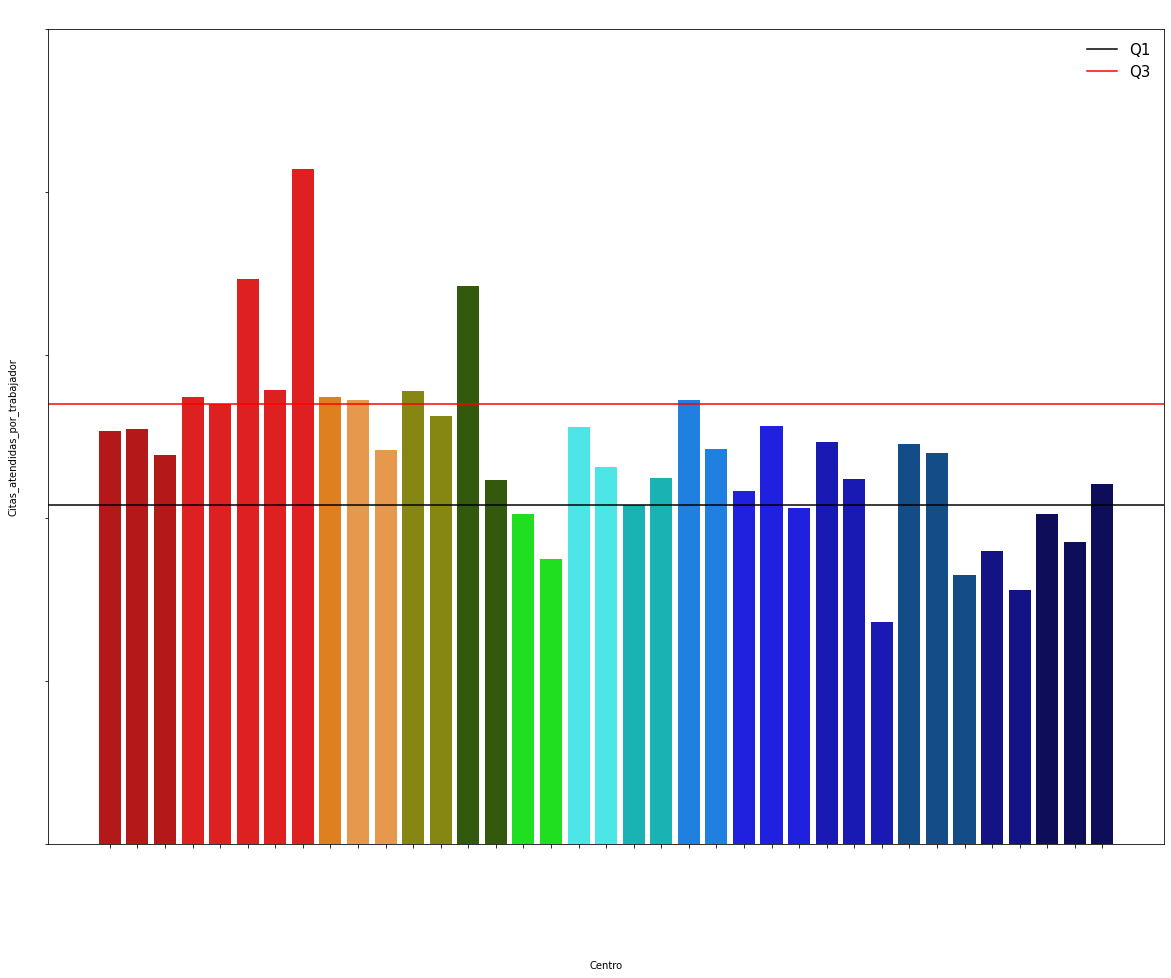

In [65]:
plt.figure(figsize=(20,15))

sns.barplot(x="Centro",
            y="Citas_atendidas_por_trabajador",
            palette=paleta_centro,
            data=Grafico_2_2,
           ci=None)

p_25 = np.percentile(Grafico_2_2['Citas_atendidas_por_trabajador'], 25) #Q1

p_75 = np.percentile(Grafico_2_2['Citas_atendidas_por_trabajador'], 75) #Q3

plt.axhline(y=p_25, xmin=0, xmax=1,color='k')

plt.axhline(y=p_75, xmin=0, xmax=1,color='r')

plt.title("Relación entre personas atendidas al día por Trabajadores en centro",fontsize=20,color='w')

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.ylim (0,10)

plt.plot(p_25, label = "Q1",color='k')

plt.plot(p_75, label = "Q3",color='r')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

Se observa que hay unos pocos centros sociales con muchas carga de trabajo (por encima del Cuartil 3) y bastantes centros sociales con menor carga de trabajo (por debajo del Cuartil 1).

2.- Segunda opción de Gráfica

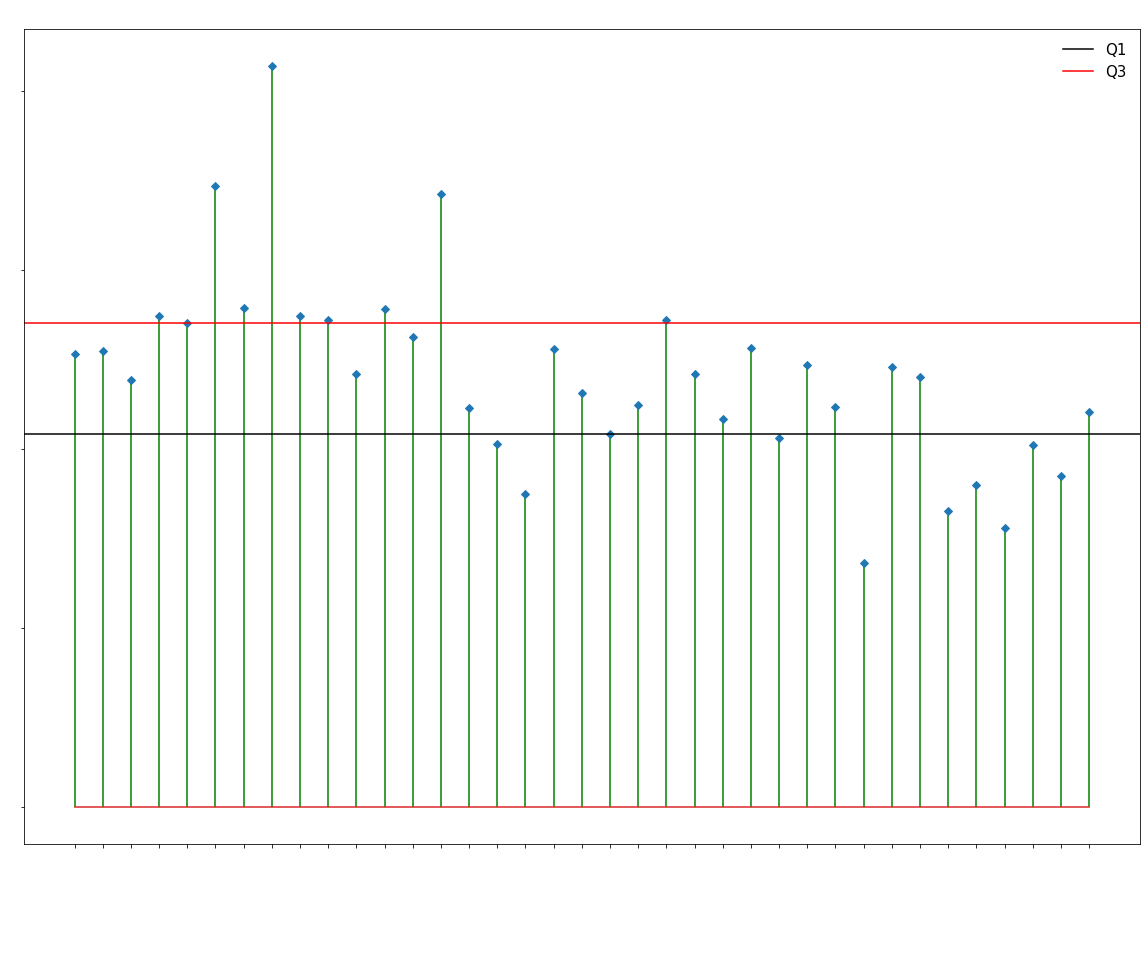

In [66]:
plt.figure(figsize=(20,15))

plt.stem(Grafico_2_2["Centro"],Grafico_2_2['Citas_atendidas_por_trabajador'],linefmt='green',markerfmt='D')

p_25 = np.percentile(Grafico_2_2['Citas_atendidas_por_trabajador'], 25) #Q1

p_75 = np.percentile(Grafico_2_2['Citas_atendidas_por_trabajador'], 75) #Q3

plt.axhline(y=p_25, xmin=0, xmax=1,color='k')

plt.axhline(y=p_75, xmin=0, xmax=1,color='r')

plt.title("Relación entre citas atendidas al día y Trabajadores en centro",color='w',fontsize=20);

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.plot(p_25, label = "Q1",color='k')

plt.plot(p_75, label = "Q3",color='r')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

Se observa que hay unos pocos centros sociales con muchas carga de trabajo (por encima del Cuartil 3) y bastantes centros sociales con menor carga de trabajo (por debajo del Cuartil 1).

#### GRAFICA 6

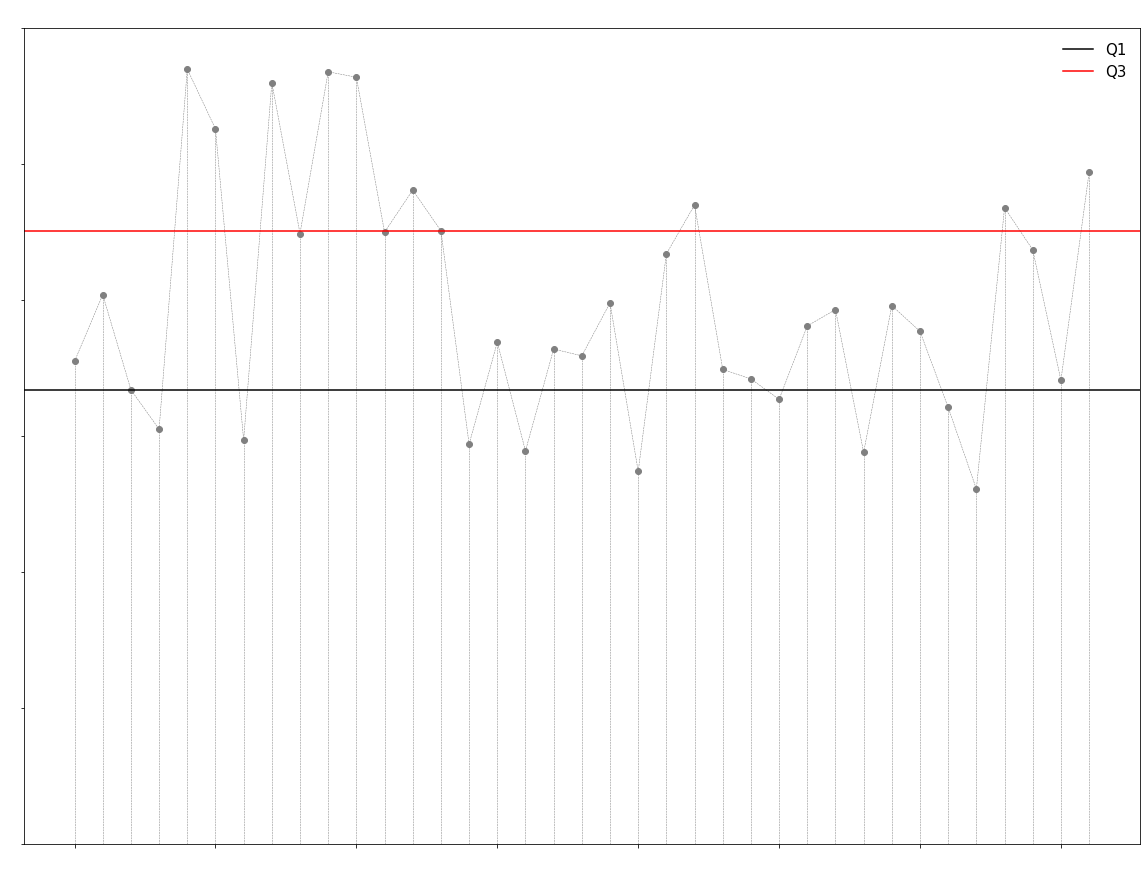

In [69]:
plt.figure(figsize=(20,15))

(stemlines) = plt.stem(Grafico_2_2["Citas_proporcionadas_por_trabajador"])

p_25 = np.percentile(Grafico_2_2['Citas_proporcionadas_por_trabajador'], 25) #Q1

p_75 = np.percentile(Grafico_2_2['Citas_proporcionadas_por_trabajador'], 75) #Q3

plt.axhline(y=p_25, xmin=0, xmax=1,color='k')

plt.axhline(y=p_75, xmin=0, xmax=1,color='r')

plt.ylim (0,6)

plt.plot(p_25, label = "Q1",color='k')

plt.plot(p_75, label = "Q3",color='r')

plt.setp(stemlines, linestyle="--", color="grey", linewidth=0.5)

plt.title("Relación entre citas solicitadas al día por Trabajadores en centro",fontsize=20,color='w')

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

Se observa que hay tantos centros de Servicios Sociales con pocas citas solicitadas como centros de Servicios Sociales con muchas citas solicitadas.

#### GRAFICA 7

In [73]:
mapa = folium.Map(location=[40.4167, -3.6840],
                 zoom_start=12)

for (index, row) in mapa_css.iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['lon']],
                 popup = row.loc['Nombre distrito']+'    Centro:' + row['Centro']+'     Nº Trabajadores:  ' + row['Trabajadores Sociales Total'] + '      Usuarios Atendidos al dia:' +row.loc['Citas_atendidas_por_trabajador']  + '       Citas Solicitadas al dia: ' + row.loc['Citas_proporcionadas_por_trabajador'],
                 tooltip = 'click').add_to(mapa)

for i in mapa_css.itertuples():
    folium.Marker(location=[i.lat, i.lon],
                  popup=i.Centro,
                  icon=plugins.BeautifyIcon(
                    icon='e3b2',
                    border_color='white',
                    border_width=1,
                    background_color=i.Color)).add_to(mapa)

mapa

In [71]:
mapa.save('Graphics\mapa_css_madrid.html')                       ## Grabamos el mapa para visualizarlo en presentación

## CONCLUSIÓN:

De las dos que hemos planteado al principio de este Análisis Exploratorio de Datos (EDA), solo hemos podido confirmar la __primera hipótesis__.

Se ve que hay varios Centros de Atención Primaria,cuyos Trabajadores Sociales, están sobrecargados de Trabajo (llegando a tener un promedio más de 7 usuarios atendidos al día por Trabajador Social), frente a otros Centros de Atención Primaria que tienen mucha menor carga de trabajo.

También se ve que en estos Centros  se atiende a más usuarios que los que deberían de tener al compararlo con los promedios de Citas solicitadas al día. Esto hace suponer que o bien tienen varios servicios de urgencias o bien que los usuarios van sin cita previa y se les atiende.

En relación con la __segunda hipótesis__ no se ha podido obtener suficiente información para poder aplicar un estudio.

De la información recabada en los Datasets se puede realizar más estudios sobre la calidad y las demandas de los usuarios, como podría ser el tipo de ayuda/demanda que más solicitan e incluso referenciarla a si son estacionales o no.

